.

In [1]:
import pandas as pd  # Fast DataFrame library, quite similar to pandas API
import numpy as np

In [2]:
# import the data (multilabel)
df = pd.read_csv("Data/App Reviews-Multilabel.csv")

print(df.head())
print(df.describe())


                                              review  bug_report  \
0                                 يبيله تصليحات كثير           1   
1                  ماتحملت ابدددددا ونا دفعت فلوس 🤔😕           0   
2  اتمنى منكم عمل خيار لتفضيل المسلسل بالكامل عوض...           0   
3      ممتاز وبسيط وتشغيله لا يؤثر على سرعة الانترنت           0   
4                                تبين م لي ي تم ل يب           0   

   improvement_request  rating  others  
0                    1       1       0  
1                    1       1       1  
2                    1       1       0  
3                    0       1       0  
4                    0       1       1  
        bug_report  improvement_request       rating       others
count  2900.000000          2900.000000  2900.000000  2900.000000
mean      0.401379             0.380345     0.679655     0.282759
std       0.490262             0.485555     0.466690     0.450418
min       0.000000             0.000000     0.000000     0.000000
25%       0.000

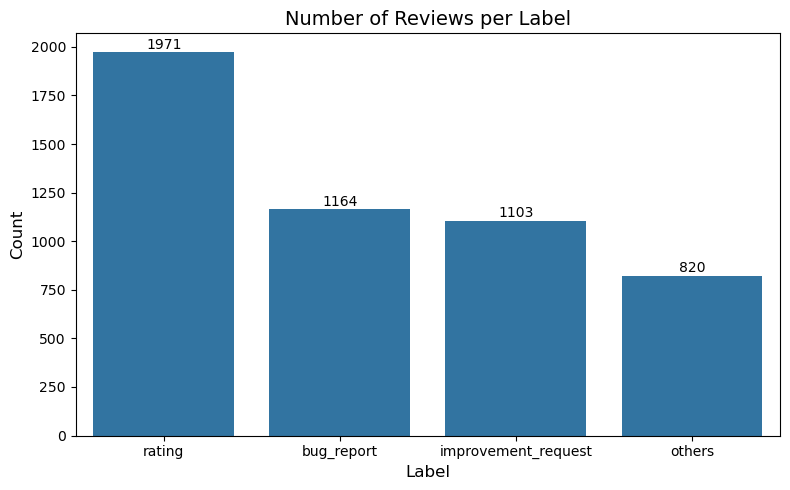

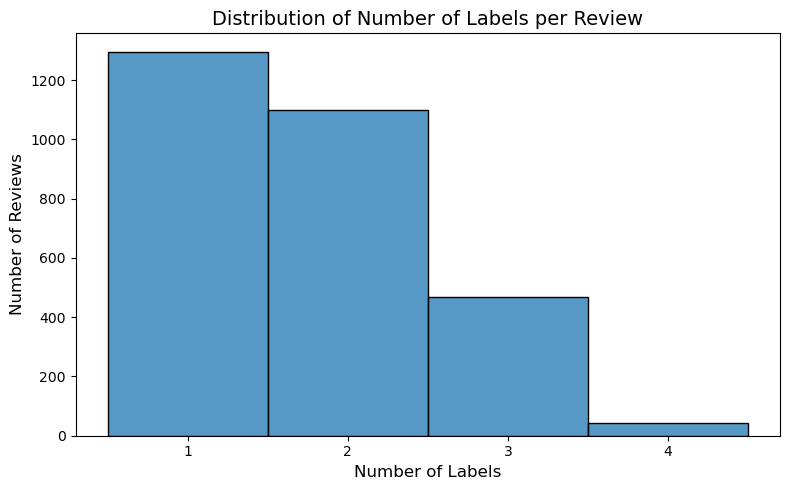

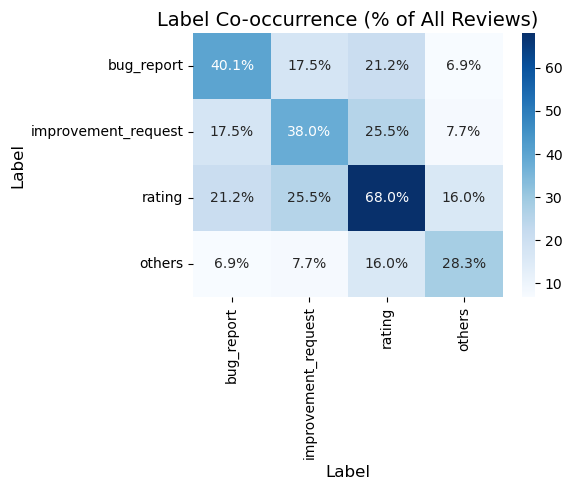

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

label_cols = ["bug_report", "improvement_request", "rating", "others"]


# Number of Reviews per Label
counts = df[label_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=counts.index, y=counts.values)
plt.title("Number of Reviews per Label", fontsize=14)
plt.xlabel("Label", fontsize=12)
plt.ylabel("Count", fontsize=12)
for i, v in enumerate(counts.values):
    ax.text(i, v + max(counts.values) * 0.01, str(v), ha="center")
plt.tight_layout()
plt.show()


# labels per Sample Histogram
n_labels = df[label_cols].sum(axis=1)

plt.figure(figsize=(8, 5))
ax = sns.histplot(n_labels, bins=range(n_labels.max() + 2), discrete=True)
plt.title("Distribution of Number of Labels per Review", fontsize=14)
plt.xlabel("Number of Labels", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.xticks(sorted(n_labels.unique()))
plt.tight_layout()
plt.show()


# Co-occurrence Matrix Heatmap
co_occurrence_matrix = (
    pd.DataFrame(
        data=df[label_cols].T.dot(df[label_cols]), index=label_cols, columns=label_cols
    )
    / len(df)
    * 100
)

plt.figure(figsize=(6, 5))
ax = sns.heatmap(
    co_occurrence_matrix,
    annot=co_occurrence_matrix.map(lambda x: f"{x:.1f}%"),
    fmt="",
    cmap="Blues",
)
plt.title("Label Co-occurrence (% of All Reviews)", fontsize=14)
plt.xlabel("Label", fontsize=12)
plt.ylabel("Label", fontsize=12)
plt.tight_layout()
plt.show()

In [4]:
def sentence_length_data(data: pd.Series):
    return df.review.apply(str.split).apply(len)


def sentence_length_distribution(data: pd.Series):
    sns.violinplot(data)
    sns.boxplot(data)
    plt.show()

In [5]:
sentence_length = sentence_length_data(df.review) 
longest_sentence = np.argmax(sentence_length)
print("length of longest sentence: ", len(df.review[longest_sentence]))

length of longest sentence:  3023


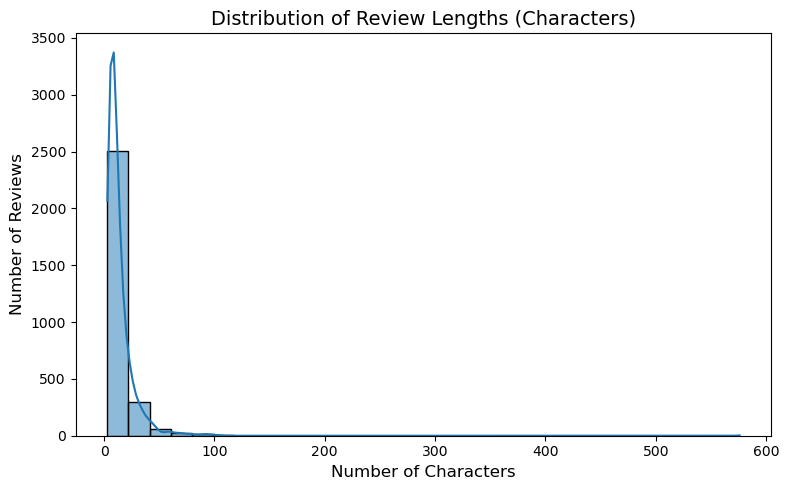

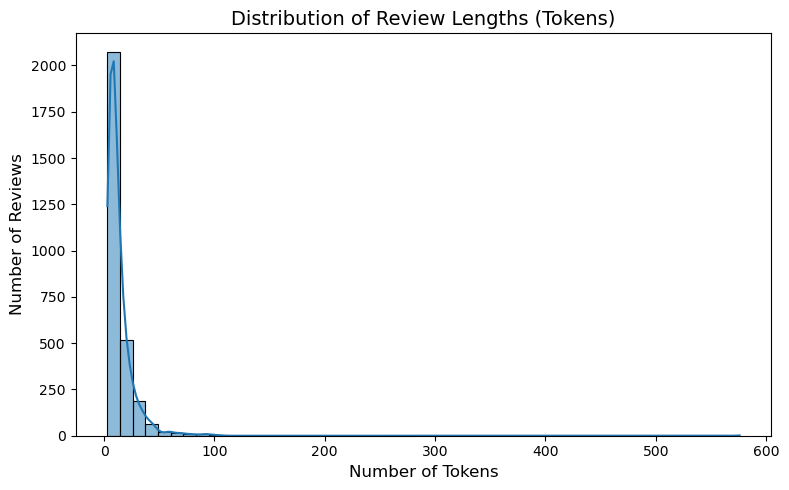

In [6]:
#character Count per Review
plt.figure(figsize=(8, 5))
ax = sns.histplot(sentence_length, bins=30, kde=True)
plt.title("Distribution of Review Lengths (Characters)", fontsize=14)
plt.xlabel("Number of Characters", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.tight_layout()
plt.show()

#token Count per Review (naive split)
token_count = df["review"].str.split().apply(len)

plt.figure(figsize=(8, 5))
ax = sns.histplot(token_count, bins=50, kde=True)
plt.title("Distribution of Review Lengths (Tokens)", fontsize=14)
plt.xlabel("Number of Tokens", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.tight_layout()
plt.show()

In [7]:
# as we can see the distribution is hugly skewed, we can discard some outliers.
max_length = np.arange(20, 71)
for length in max_length:
    print(
        f"Percentage of outliers with max length {length}: {len(sentence_length[sentence_length > length])/len(df) * 100}%"
    )

Percentage of outliers with max length 20: 16.275862068965516%
Percentage of outliers with max length 21: 14.931034482758621%
Percentage of outliers with max length 22: 13.620689655172413%
Percentage of outliers with max length 23: 12.586206896551724%
Percentage of outliers with max length 24: 11.655172413793103%
Percentage of outliers with max length 25: 10.724137931034484%
Percentage of outliers with max length 26: 9.689655172413794%
Percentage of outliers with max length 27: 9.137931034482758%
Percentage of outliers with max length 28: 8.482758620689655%
Percentage of outliers with max length 29: 7.827586206896552%
Percentage of outliers with max length 30: 7.310344827586207%
Percentage of outliers with max length 31: 6.862068965517241%
Percentage of outliers with max length 32: 6.344827586206897%
Percentage of outliers with max length 33: 5.827586206896552%
Percentage of outliers with max length 34: 5.344827586206897%
Percentage of outliers with max length 35: 5.103448275862069%
Pe

In [8]:
# see distrubtion of len >38 #TODO: check if this is correct
df.drop(index=sentence_length[sentence_length > 50].index, axis=1, inplace=True)

In [9]:
emojiss = {
    "🙂": "يبتسم",
    "😂": "يضحك",
    "💔": "قلب حزين",
    "🙂": "يبتسم",
    "❤️": "حب",
    "❤": "حب",
    "😍": "حب",
    "😭": "يبكي",
    "😢": "حزن",
    "😔": "حزن",
    "♥": "حب",
    "💜": "حب",
    "😅": "يضحك",
    "🙁": "حزين",
    "💕": "حب",
    "💙": "حب",
    "😞": "حزين",
    "😊": "سعادة",
    "👏": "يصفق",
    "👌": "احسنت",
    "😴": "ينام",
    "😀": "يضحك",
    "😌": "حزين",
    "🌹": "وردة",
    "🙈": "حب",
    "😄": "يضحك",
    "😐": "محايد",
    "✌": "منتصر",
    "✨": "نجمه",
    "🤔": "تفكير",
    "😏": "يستهزء",
    "😒": "يستهزء",
    "🙄": "ملل",
    "😕": "عصبية",
    "😃": "يضحك",
    "🌸": "وردة",
    "😓": "حزن",
    "💞": "حب",
    "💗": "حب",
    "😑": "منزعج",
    "💭": "تفكير",
    "😎": "ثقة",
    "💛": "حب",
    "😩": "حزين",
    "💪": "عضلات",
    "👍": "موافق",
    "🙏🏻": "رجاء طلب",
    "😳": "مصدوم",
    "👏🏼": "تصفيق",
    "🎶": "موسيقي",
    "🌚": "صمت",
    "💚": "حب",
    "🙏": "رجاء طلب",
    "💘": "حب",
    "🍃": "سلام",
    "☺": "يضحك",
    "🐸": "ضفدع",
    "😶": "مصدوم",
    "✌️": "مرح",
    "✋🏻": "توقف",
    "😉": "غمزة",
    "🌷": "حب",
    "🙃": "مبتسم",
    "😫": "حزين",
    "😨": "مصدوم",
    "🎼 ": "موسيقي",
    "🍁": "مرح",
    "🍂": "مرح",
    "💟": "حب",
    "😪": "حزن",
    "😆": "يضحك",
    "😣": "استياء",
    "☺️": "حب",
    "😱": "كارثة",
    "😁": "يضحك",
    "😖": "استياء",
    "🏃🏼": "يجري",
    "😡": "غضب",
    "🚶": "يسير",
    "🤕": "مرض",
    "‼️": "تعجب",
    "🕊": "طائر",
    "👌🏻": "احسنت",
    "❣": "حب",
    "🙊": "مصدوم",
    "💃": "سعادة مرح",
    "💃🏼": "سعادة مرح",
    "😜": "مرح",
    "👊": "ضربة",
    "😟": "استياء",
    "💖": "حب",
    "😥": "حزن",
    "🎻": "موسيقي",
    "✒": "يكتب",
    "🚶🏻": "يسير",
    "💎": "الماظ",
    "😷": "وباء مرض",
    "☝": "واحد",
    "🚬": "تدخين",
    "💐": "ورد",
    "🌞": "شمس",
    "👆": "الاول",
    "⚠️": "تحذير",
    "🤗": "احتواء",
    "✖️": "غلط",
    "📍": "مكان",
    "👸": "ملكه",
    "👑": "تاج",
    "✔️": "صح",
    "💌": "قلب",
    "😲": "مندهش",
    "💦": "ماء",
    "🚫": "خطا",
    "👏🏻": "برافو",
    "🏊": "يسبح",
    "👍🏻": "تمام",
    "⭕️": "دائره كبيره",
    "🎷": "ساكسفون",
    "👋": "تلويح باليد",
    "✌🏼": "علامه النصر",
    "🌝": "مبتسم",
    "➿": "عقده مزدوجه",
    "💪🏼": "قوي",
    "📩": "تواصل معي",
    "☕️": "قهوه",
    "😧": "قلق و صدمة",
    "🗨": "رسالة",
    "❗️": "تعجب",
    "🙆🏻": "اشاره موافقه",
    "👯": "اخوات",
    "©": "رمز",
    "👵🏽": "سيده عجوزه",
    "🐣": "كتكوت",
    "🙌": "تشجيع",
    "🙇": "شخص ينحني",
    "👐🏽": "ايدي مفتوحه",
    "👌🏽": "بالظبط",
    "⁉️": "استنكار",
    "⚽️": "كوره",
    "🕶": "حب",
    "🎈": "بالون",
    "🎀": "ورده",
    "💵": "فلوس",
    "😋": "جائع",
    "😛": "يغيظ",
    "😠": "غاضب",
    "✍🏻": "يكتب",
    "🌾": "ارز",
    "👣": "اثر قدمين",
    "❌": "رفض",
    "🍟": "طعام",
    "👬": "صداقة",
    "🐰": "ارنب",
    "☂": "مطر",
    "⚜": "مملكة فرنسا",
    "🐑": "خروف",
    "🗣": "صوت مرتفع",
    "👌🏼": "احسنت",
    "☘": "مرح",
    "😮": "صدمة",
    "😦": "قلق",
    "⭕": "الحق",
    "✏️": "قلم",
    "ℹ": "معلومات",
    "🙍🏻": "رفض",
    "⚪️": "نضارة نقاء",
    "🐤": "حزن",
    "💫": "مرح",
    "💝": "حب",
    "🍔": "طعام",
    "❤︎": "حب",
    "✈️": "سفر",
    "🏃🏻‍♀️": "يسير",
    "🍳": "ذكر",
    "🎤": "مايك غناء",
    "🎾": "كره",
    "🐔": "دجاجة",
    "🙋": "سؤال",
    "📮": "بحر",
    "💉": "دواء",
    "🙏🏼": "رجاء طلب",
    "💂🏿 ": "حارس",
    "🎬": "سينما",
    "♦️": "مرح",
    "💡": "قكرة",
    "‼": "تعجب",
    "👼": "طفل",
    "🔑": "مفتاح",
    "♥️": "حب",
    "🕋": "كعبة",
    "🐓": "دجاجة",
    "💩": "معترض",
    "👽": "فضائي",
    "☔️": "مطر",
    "🍷": "عصير",
    "🌟": "نجمة",
    "☁️": "سحب",
    "👃": "معترض",
    "🌺": "مرح",
    "🔪": "سكينة",
    "♨": "سخونية",
    "👊🏼": "ضرب",
    "✏": "قلم",
    "🚶🏾‍♀️": "يسير",
    "👊": "ضربة",
    "◾️": "وقف",
    "😚": "حب",
    "🔸": "مرح",
    "👎🏻": "لا يعجبني",
    "👊🏽": "ضربة",
    "😙": "حب",
    "🎥": "تصوير",
    "👉": "جذب انتباه",
    "👏🏽": "يصفق",
    "💪🏻": "عضلات",
    "🏴": "اسود",
    "🔥": "حريق",
    "😬": "عدم الراحة",
    "👊🏿": "يضرب",
    "🌿": "ورقه شجره",
    "✋🏼": "كف ايد",
    "👐": "ايدي مفتوحه",
    "☠️": "وجه مرعب",
    "🎉": "يهنئ",
    "🔕": "صامت",
    "😿": "وجه حزين",
    "☹️": "وجه يائس",
    "😘": "حب",
    "😰": "خوف و حزن",
    "🌼": "ورده",
    "💋": "بوسه",
    "👇": "لاسفل",
    "❣️": "حب",
    "🎧": "سماعات",
    "📝": "يكتب",
    "😇": "دايخ",
    "😈": "رعب",
    "🏃": "يجري",
    "✌🏻": "علامه النصر",
    "🔫": "يضرب",
    "❗️": "تعجب",
    "👎": "غير موافق",
    "🔐": "قفل",
    "👈": "لليمين",
    "™": "رمز",
    "🚶🏽": "يتمشي",
    "😯": "متفاجأ",
    "✊": "يد مغلقه",
    "😻": "اعجاب",
    "🙉": "قرد",
    "👧": "طفله صغيره",
    "🔴": "دائره حمراء",
    "💪🏽": "قوه",
    "💤": "ينام",
    "👀": "ينظر",
    "✍🏻": "يكتب",
    "❄️": "تلج",
    "💀": "رعب",
    "😤": "وجه عابس",
    "🖋": "قلم",
    "🎩": "كاب",
    "☕️": "قهوه",
    "😹": "ضحك",
    "💓": "حب",
    "☄️ ": "نار",
    "👻": "رعب",
}


# replace emojis with their meanings
def replace_emojis(txt):
    txt = list(txt)
    for i in range(len(txt)):
        if txt[i] in emojiss:
            txt[i] = emojiss[txt[i]] + " "
    txt = "".join(txt)
    return txt



# Text processing

In [10]:
import re
import nltk
from nltk.corpus import stopwords


from camel_tools.utils.dediac import dediac_ar
from camel_tools.utils.charmap import CharMapper

from camel_tools.morphology.analyzer import DEFAULT_NORMALIZE_MAP
from farasa.stemmer import FarasaStemmer

nltk.download("stopwords")
#stemmer = FarasaStemmer()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mohammed/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
arclean = CharMapper.builtin_mapper("arclean")
arabic_stopwords = set(stopwords.words("arabic"))

URL_EMAIL_DIGITS_RE = re.compile(r"http\S+|www\.\S+|\S+@\S+|\d{4,}")
REPEAT_CHAR_RE = re.compile(r"(.)\1{2,}")
WHITESPACE_RE = re.compile(r"\s+")
# remove all punctuation except Arabic letters and digits
PUNCTUATION_RE = re.compile(r"[^\w\s\u0600-\u06FF]")


def clean(txt):
    txt = replace_emojis(txt)
    # Deleting characters that are not in Arabic, ASCII, or Latin-1.
    # Converting all spacing characters to an ASCII space character.
    # Converting Indic digits into Arabic digits.
    # Converting extended Arabic letters into basic Arabic letters. جيم مشبعة
    # Converting 1-char presentation froms into simple basic forms. بسم الله
    txt = arclean(txt)

    ####### normalize, dediac
    txt = txt = DEFAULT_NORMALIZE_MAP.map_string(txt)
    txt = dediac_ar(txt)

    # urls, emails, more than 3 consecutive digits (could be phone numbers)
    txt = URL_EMAIL_DIGITS_RE.sub(" ", txt)
    # Collapse repeated chars >= 2
    txt = REPEAT_CHAR_RE.sub(r"\1", txt)

    # remove newlines, whitespace, punctuatio
    txt = WHITESPACE_RE.sub(" ", txt).strip()

    # remove stop words,
    # txt = " ".join([word for word in txt.split(" ") if word not in arabic_stopwords])

    # txt = stemmer.stem(txt)

    return txt


# show first 20 review
print("First 20 reviews before cleaning:")
print(df["review"].head(20))
print("\nFirst 20 reviews after cleaning:")
df["review"] = df["review"].apply(clean)  # NOTE: this do the cleaning inplace
print(df["review"].head(20))

First 20 reviews before cleaning:
0                                    يبيله تصليحات كثير
1                     ماتحملت ابدددددا ونا دفعت فلوس 🤔😕
2     اتمنى منكم عمل خيار لتفضيل المسلسل بالكامل عوض...
3         ممتاز وبسيط وتشغيله لا يؤثر على سرعة الانترنت
4                                   تبين م لي ي تم ل يب
5                        التطبيق لا يعمل على النوت ايدج
6     لا يتم تسجيل الدخول بالارقام المتبعة في نظام ن...
7                                 اللعبه رافضه تفتح معي
8     تطبيق عديم الفايده ارسل بحالة ولدي ولا مجيب ول...
9     السلام عليكم ورحمة الله وبركاته\nهناك خطأ ما ي...
10                          تطبيق لا يمكن الإستغناء عنه
11                   انو تطبيق جميل جدا مره حلو,،🖤🖤❤️❤️
12    افضل ما فيه حجب الاعلانات المحتوية على صور ومو...
13                               اضغط على النجمه للتقيم
14    عند التسجيل في الموقع يطلع لي التاريخ غلط وين ...
15    اللعبة حلوة بس لو تضيف. عرف اكثر حتكون احلا و ...
16    لطيفة سيدي يوسف بن علوي بن عبدالله بن عبدالعزي...
17            

# Split and save

In [12]:
# split and save (80% train, 20% test, use 777 as seed)
import pickle
from sklearn.model_selection import train_test_split

reviews = df["review"].to_numpy()
labels = df[label_cols].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    reviews, labels, stratify=labels, test_size=0.2, random_state=777
)

# save it as pickle in data/multilabel_preprocessed.pkl
with open("data/multilabel_train.pkl", "wb") as f:
    pickle.dump((X_train, y_train), f)

with open("data/multilabel_test.pkl", "wb") as f:
    pickle.dump((X_test, y_test), f)